# **Capstone II Preprocessing and Training Data Development**

In this section we prepare our cleaned data for modeling. Most ML models, and certainly the one we plan to use for this project, require data to be numeric. To this end we will OneHot encode our non-numeric categorical variables. Furthermore, the results of any model application may not make much sense if the scales of the features of the data the model is fed are incommensurate with each other. Therefore, we will also apply a scaler to our data. 

Lastly, we will divide our data up into train/test splits so everything is ready to go for the modeling stage.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"..\Data\heart_data_cleaned.csv")
df_dropped_chol = pd.read_csv(r"..\Data\heart_data_dropped_chol.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# OneHot the categorical columns of each data set, overwriting the original object. We plan to save these as
# new csv files eventually.
df = pd.get_dummies(df)
df_dropped_chol = pd.get_dummies(df_dropped_chol)
df.columns, df_dropped_chol.columns

(Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
        'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
        'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
        'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
        'ST_Slope_Flat', 'ST_Slope_Up'],
       dtype='object'),
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
        'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
        'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
        'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
        'ST_Slope_Flat', 'ST_Slope_Up'],
       dtype='object'))

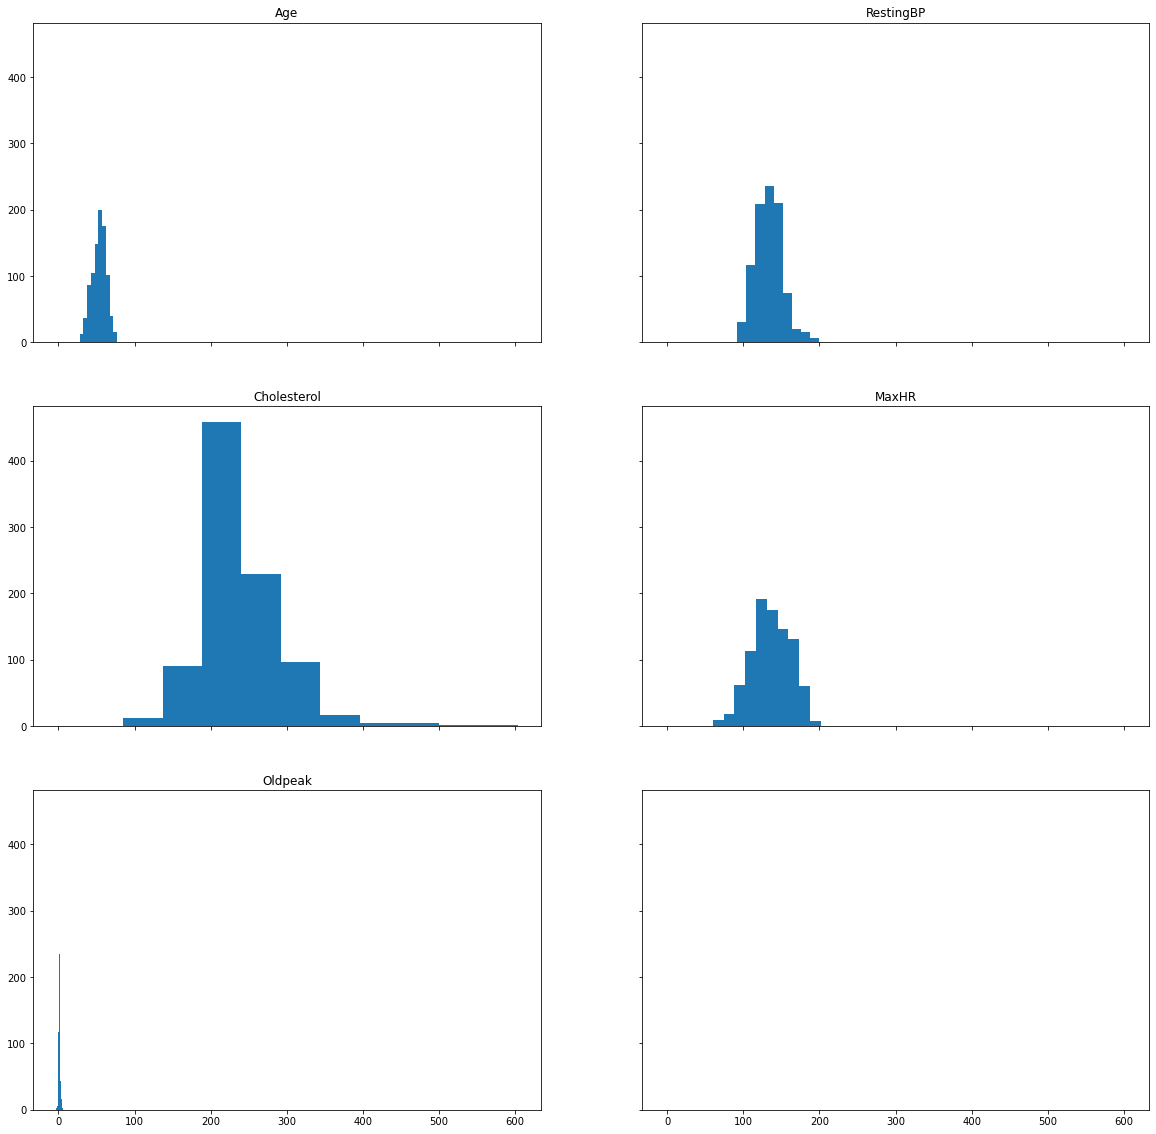

In [5]:
# Let's compare our numeric columns to see what kind of scaling we should consider
num_columns = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
fig, axs = plt.subplots(3, 2, sharex=True, sharey = True)

axs[0, 0].hist(num_columns['Age'])
axs[0, 0].set_title('Age')
axs[0, 1].hist(num_columns['RestingBP'])
axs[0, 1].set_title('RestingBP')

axs[1, 0].hist(num_columns['Cholesterol'])
axs[1, 0].set_title('Cholesterol')
axs[1, 1].hist(num_columns['MaxHR'])
axs[1, 1].set_title('MaxHR')

axs[2, 0].hist(num_columns['Oldpeak'])
axs[2, 0].set_title('Oldpeak')

fig.set_size_inches(20, 20)

In [6]:
# Oldpeak's values are all centered around 0 in a very tight spread, while the other numerical columns take on values in the 
# hundreds. This is not such a skewed scale that we will need to log transform. 
# Before scaling, however, we must create our train/testing split. We will split and scale both data sets.
from sklearn.model_selection import train_test_split

X1 = df.drop(columns= ['HeartDisease']).to_numpy()
X1_column_names = df.drop(columns= ['HeartDisease']).columns
y1 = df[['HeartDisease']].to_numpy()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [7]:
# Now we use standardization as our scaling method
# First fit and transform the training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X1_train)
X1_train_scaled = scaler.transform(X1_train)
X1_train_scaled

array([[ 0.24734343,  1.27485964,  1.87392472, ..., -0.26788593,
         1.00437639, -0.87784882],
       [ 0.24734343,  1.27485964, -0.35880817, ..., -0.26788593,
         1.00437639, -0.87784882],
       [ 0.56635144,  0.9908317 , -0.56519525, ..., -0.26788593,
        -0.99564268,  1.13914831],
       ...,
       [ 1.20436747, -1.28139187,  0.11025336, ..., -0.26788593,
        -0.99564268,  1.13914831],
       [ 0.67268745,  1.10444288, -0.35880817, ..., -0.26788593,
        -0.99564268,  1.13914831],
       [-1.45403264,  0.9908317 ,  2.81204778, ..., -0.26788593,
         1.00437639, -0.87784882]])

In [8]:
# And now we tranform the testing data using the same already fit scaler object

X1_test_scaled = scaler.transform(X1_test)
X1_test_scaled

array([[-0.92235262, -0.14528009, -0.1524211 , ..., -0.26788593,
         1.00437639, -0.87784882],
       [-0.07166459,  0.70680375,  5.1761179 , ..., -0.26788593,
         1.00437639, -0.87784882],
       [ 1.20436747,  1.55888759, -0.35880817, ..., -0.26788593,
         1.00437639, -0.87784882],
       ...,
       [-0.07166459, -0.42930803, -0.35880817, ..., -0.26788593,
        -0.99564268,  1.13914831],
       [ 0.03467142, -1.28139187, -0.64024509, ..., -0.26788593,
        -0.99564268,  1.13914831],
       [-1.56036865,  0.30916463, -0.41509556, ..., -0.26788593,
         1.00437639, -0.87784882]])

In [9]:
# And now we make data frames out of the transformed arrays to save for later
train1_scaled_df = pd.concat([pd.DataFrame(X1_train_scaled, columns=X1_column_names), pd.DataFrame(y1_train, columns=['HeartDisease'])],
                      axis = 1)
train1_scaled_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,0.247343,1.274860,1.873925,1.844952,0.550076,1.917754,-0.526262,0.526262,0.933774,-0.480815,...,-0.231692,-0.517231,0.824443,-0.489972,-1.194806,1.194806,-0.267886,1.004376,-0.877849,1
1,0.247343,1.274860,-0.358808,-0.542020,-1.478661,-0.830849,-0.526262,0.526262,-1.070922,-0.480815,...,-0.231692,-0.517231,-1.212940,2.040934,0.836956,-0.836956,-0.267886,1.004376,-0.877849,1
2,0.566351,0.990832,-0.565195,1.844952,0.828530,0.635073,-0.526262,0.526262,-1.070922,-0.480815,...,-0.231692,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,-0.995643,1.139148,0
3,-0.284337,-0.145280,-1.184356,-0.542020,-1.438882,-0.830849,-0.526262,0.526262,0.933774,-0.480815,...,-0.231692,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,-0.995643,1.139148,0
4,0.353679,-0.145280,1.236001,-0.542020,-1.518441,0.085352,1.900194,-1.900194,-1.070922,-0.480815,...,4.316083,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,1.004376,-0.877849,0


In [10]:
test1_scaled_df = pd.concat([pd.DataFrame(X1_test_scaled, columns=X1_column_names), pd.DataFrame(y1_test, columns=['HeartDisease'])],
                      axis = 1)
test1_scaled_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-0.922353,-0.145280,-0.152421,-0.542020,1.544555,-0.281128,1.900194,-1.900194,-1.070922,2.079803,...,-0.231692,1.933373,-1.212940,-0.489972,0.836956,-0.836956,-0.267886,1.004376,-0.877849,0
1,-0.071665,0.706804,5.176118,-0.542020,-0.245507,-0.830849,-0.526262,0.526262,-1.070922,-0.480815,...,-0.231692,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,1.004376,-0.877849,1
2,1.204367,1.558888,-0.358808,1.844952,-0.563741,0.268592,-0.526262,0.526262,0.933774,-0.480815,...,-0.231692,-0.517231,-1.212940,2.040934,0.836956,-0.836956,-0.267886,1.004376,-0.877849,1
3,0.885359,0.025137,-0.358808,1.844952,-0.683078,0.268592,-0.526262,0.526262,-1.070922,-0.480815,...,-0.231692,-0.517231,-1.212940,2.040934,-1.194806,1.194806,-0.267886,1.004376,-0.877849,1
4,0.034671,-1.395003,1.254763,-0.542020,0.788751,-0.830849,-0.526262,0.526262,-1.070922,2.079803,...,-0.231692,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,-0.995643,1.139148,0


In [11]:
# Save the full dataset's fully processed train and test splits
train1_scaled_df.to_csv('../Data/full_train.csv', index=False)
test1_scaled_df.to_csv('../Data/full_test.csv', index=False)

In [12]:
# And now the smaller version
from sklearn.model_selection import train_test_split

X2 = df_dropped_chol.drop(columns= ['HeartDisease']).to_numpy()
X2_column_names = df_dropped_chol.drop(columns= ['HeartDisease']).columns
y2 = df_dropped_chol[['HeartDisease']].to_numpy()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_train_scaled

array([[-1.26208339,  0.99897053, -1.27845023, ..., -0.23814024,
         1.04952549, -0.94260995],
       [-0.20372063,  0.24473481,  1.64077312, ..., -0.23814024,
         1.04952549, -0.94260995],
       [ 0.43129703, -0.50950092,  0.28541942, ..., -0.23814024,
        -0.95281154,  1.0608842 ],
       ...,
       [-0.83873829, -0.74157345, -0.34012844, ..., -0.23814024,
        -0.95281154,  1.0608842 ],
       [ 0.00795192,  0.65086173,  0.96309627, ..., -0.23814024,
         1.04952549, -0.94260995],
       [-1.36791967,  0.99897053,  2.56171858, ..., -0.23814024,
         1.04952549, -0.94260995]])

In [14]:
X2_test_scaled = scaler.transform(X2_test)
X2_test_scaled

array([[-2.63795499, -0.16139212, -1.95612707, ..., -0.23814024,
        -0.95281154,  1.0608842 ],
       [ 0.21962447, -0.62553718,  1.31062286, ..., -0.23814024,
        -0.95281154,  1.0608842 ],
       [-1.47375595,  1.57915185, -1.69548213, ..., -0.23814024,
        -0.95281154,  1.0608842 ],
       ...,
       [-1.36791967, -0.16139212, -0.51389173, ..., -0.23814024,
        -0.95281154,  1.0608842 ],
       [ 0.43129703, -0.16139212,  1.10210691, ..., -0.23814024,
         1.04952549, -0.94260995],
       [ 0.32546075, -0.16139212, -0.44438641, ..., -0.23814024,
        -0.95281154,  1.0608842 ]])

In [15]:
train2_scaled_df = pd.concat([pd.DataFrame(X2_train_scaled, columns=X2_column_names), pd.DataFrame(y2_train, columns=['HeartDisease'])],
                      axis = 1)
train2_scaled_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.262083,0.998971,-1.278450,-0.435157,-0.500054,0.536384,-0.569776,0.569776,0.991095,-0.531140,...,-0.225282,-0.564266,0.811636,-0.429327,-1.260144,1.260144,-0.23814,1.049525,-0.942610,0
1,-0.203721,0.244735,1.640773,-0.435157,-0.540695,0.723959,-0.569776,0.569776,-1.008985,-0.531140,...,-0.225282,-0.564266,0.811636,-0.429327,-1.260144,1.260144,-0.23814,1.049525,-0.942610,1
2,0.431297,-0.509501,0.285419,-0.435157,0.028282,-0.589066,-0.569776,0.569776,-1.008985,1.882741,...,-0.225282,-0.564266,0.811636,-0.429327,0.793560,-0.793560,-0.23814,-0.952812,1.060884,1
3,0.642970,-0.161392,-0.983053,-0.435157,-0.662618,0.067446,1.755076,-1.755076,-1.008985,1.882741,...,-0.225282,-0.564266,0.811636,-0.429327,0.793560,-0.793560,-0.23814,1.049525,-0.942610,0
4,1.066315,0.998971,-0.374881,-0.435157,-1.028389,-0.870429,-0.569776,0.569776,0.991095,-0.531140,...,-0.225282,-0.564266,0.811636,-0.429327,0.793560,-0.793560,-0.23814,1.049525,-0.942610,1


In [16]:
test2_scaled_df = pd.concat([pd.DataFrame(X2_test_scaled, columns=X2_column_names), pd.DataFrame(y2_test, columns=['HeartDisease'])],
                      axis = 1)
test2_scaled_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-2.637955,-0.161392,-1.956127,-0.435157,1.816493,-0.870429,-0.569776,0.569776,-1.008985,1.882741,...,-0.225282,1.772214,-1.232079,-0.429327,0.793560,-0.793560,-0.23814,-0.952812,1.060884,0
1,0.219624,-0.625537,1.310623,-0.435157,0.597258,-0.870429,1.755076,-1.755076,-1.008985,1.882741,...,-0.225282,-0.564266,0.811636,-0.429327,0.793560,-0.793560,-0.23814,-0.952812,1.060884,0
2,-1.473756,1.579152,-1.695482,2.298021,0.800464,-0.870429,-0.569776,0.569776,-1.008985,-0.531140,...,-0.225282,-0.564266,0.811636,-0.429327,0.793560,-0.793560,-0.23814,-0.952812,1.060884,0
3,-0.309557,-0.741573,-1.330579,-0.435157,0.800464,-0.870429,-0.569776,0.569776,-1.008985,1.882741,...,-0.225282,-0.564266,0.811636,-0.429327,0.793560,-0.793560,-0.23814,-0.952812,1.060884,0
4,1.913005,-0.161392,-0.409634,-0.435157,-1.028389,-0.870429,-0.569776,0.569776,0.991095,-0.531140,...,-0.225282,-0.564266,-1.232079,2.329225,-1.260144,1.260144,-0.23814,1.049525,-0.942610,1


In [17]:
# Save the Swiss-less dataset's fully processed train and test splits
train2_scaled_df.to_csv('../Data/no_swiss_train.csv', index=False)
test2_scaled_df.to_csv('../Data/no_swiss_test.csv', index=False)